# Exploratory Data Analysis for Machine Learning

# Project. Airbnb in New York
- Download New York Airbnb data from Kaggle.com.
- Perform a complete EDA including all steps of the process.
- Write down the conclusions of each step and analyze the results on the relationships between the variables.

A company has collected New York housing rental data from the Airbnb app during 2019. This dataset was used to train Machine Learning models during that year, in an open competition.

We will now use it to conduct a study about the variables that make up the dataset in order to understand it and draw conclusions about it.

In [1]:
# Libraries specialized "expert kits" to plug into Python essential for EDA.
import requests
import os
from pathlib import Path
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import json
from numpy._core.defchararray import upper
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
import pickle # -- Binary (unreadable by humans) -- Can save almost any Python object -- Very fast for complex objects --


# Step 1: Problem statement and data collection

In [2]:
def setup_project_structure(base_path, subfolders):
    """Creates a standard data science directory tree."""
    for folder in subfolders:
        folder_path = Path(base_path) / folder
        folder_path.mkdir(parents=True, exist_ok=True)
    print(f"Project structure initialized in: {base_path}")

def download_dataset_to_raw(url, full_path):
    """Downloads a file to a specific path."""
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()

        with open(full_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"Download successful! Saved to: {full_path}")
        return True
    except Exception as e:
        print(f"Download failed: {e}")
        return False

# --- CONFIGURATION ---
BASE_DIR = "../data"
FOLDERS = ["raw", "processed", "interim"]
DATA_URL = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
TARGET_FILE = "AB_NYC_2019.csv"

# EXECUTION
# Build the whole house
setup_project_structure(BASE_DIR, FOLDERS)

# Put the data in the 'raw' room
RAW_FILE_PATH = Path(BASE_DIR) / "raw" / TARGET_FILE
download_dataset_to_raw(DATA_URL, RAW_FILE_PATH)

Project structure initialized in: ../data
Download successful! Saved to: ../data/raw/AB_NYC_2019.csv


True

In [3]:
# Define the full path again for reading
try:
    df = pd.read_csv(RAW_FILE_PATH)
    print("\nDataset loaded successfully into a DataFrame:")
    print(df.head())
except FileNotFoundError:
    print(f"\nError: File not found at {RAW_FILE_PATH}")


Dataset loaded successfully into a DataFrame:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private roo

# Step 2: Exploration and data cleaning
## 2.1 Visibility of dimension and tipology

In [4]:
row, col = df.shape
print(f"Dataset with number of rows {row} and columns {col}.")

Dataset with number of rows 48895 and columns 16.


## 2.2 First glance of top 5 rows

In [5]:
top_five_data = df.head()
print("These are the top 5 columns of the dataset to be analized:")
print(tabulate(top_five_data, headers='keys', tablefmt='psql'))

These are the top 5 columns of the dataset to be analized:
+----+------+--------------------------------------------------+-----------+-------------+-----------------------+-----------------+------------+-------------+-----------------+---------+------------------+---------------------+---------------+---------------------+----------------------------------+--------------------+
|    |   id | name                                             |   host_id | host_name   | neighbourhood_group   | neighbourhood   |   latitude |   longitude | room_type       |   price |   minimum_nights |   number_of_reviews | last_review   |   reviews_per_month |   calculated_host_listings_count |   availability_365 |
|----+------+--------------------------------------------------+-----------+-------------+-----------------------+-----------------+------------+-------------+-----------------+---------+------------------+---------------------+---------------+---------------------+-----------------------------

## 2.3 Data types and non-nulls values from the df.

In [6]:
print("Information about columns NoN-Null and type of the data:\n================================================")
print(df.info())

Information about columns NoN-Null and type of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               4889

## 2.4 Check Unique

In [7]:
print("Unique values for each columns on the Dataset:\n================================================")
print(df.nunique())

Unique values for each columns on the Dataset:
id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


### 2.4.1 Conclusions about the data info:
- There is a total of 48895 rows and 16 columns.
- INTEGER Dtype are 7: id, host_id, price, minimum_nights, number_of_reviews, calculated_host_listings_count and availability_365.
- FLOAT Dtype are 3: latitude, longitude and reviews_per_month.
- OBJECT Dtype are 6: name, host_name, neighbourhood_group, neighbourhood, room_type and last_review.
### Non-Null checking:
- INTEGER: All of the rows are ok with no empty cells, we can say 100% ok.
- FLOAT: 1 out of three reviews_per_month is missing at least 10K values.
- OBJECT: The column last_review, is missing at least 10k values. Probably we leave this column with those empty values as they might not be very important for the stattistical analysis. 

## 2.5 Check for duplicates values

In [8]:
duplicate_val = df.duplicated(subset= ['id', 'host_id']).sum()
print(f"Thera << {duplicate_val} >> values duplicated in the dataset.")

Thera << 0 >> values duplicated in the dataset.


## 2.6 Drop duplicates

In [9]:

df = df.drop_duplicates(subset = df.columns.difference(['id', 'host_id']))
print(df.shape)
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

(48895, 16)
+----+------+--------------------------------------------------+-----------+-------------+-----------------------+-----------------+------------+-------------+-----------------+---------+------------------+---------------------+---------------+---------------------+----------------------------------+--------------------+
|    |   id | name                                             |   host_id | host_name   | neighbourhood_group   | neighbourhood   |   latitude |   longitude | room_type       |   price |   minimum_nights |   number_of_reviews | last_review   |   reviews_per_month |   calculated_host_listings_count |   availability_365 |
|----+------+--------------------------------------------------+-----------+-------------+-----------------------+-----------------+------------+-------------+-----------------+---------+------------------+---------------------+---------------+---------------------+----------------------------------+--------------------|
|  0 | 2539 | Clean

## 2.7 Eliminate irrelevant information
I will eliminate the columns ['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review'] as these are columns with a lot of unique values and also do not affect the target variable **price**

In [10]:
df = df.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review'], axis= 1)
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

+----+-----------------------+-----------------+-----------------+---------+------------------+---------------------+---------------------+----------------------------------+--------------------+
|    | neighbourhood_group   | neighbourhood   | room_type       |   price |   minimum_nights |   number_of_reviews |   reviews_per_month |   calculated_host_listings_count |   availability_365 |
|----+-----------------------+-----------------+-----------------+---------+------------------+---------------------+---------------------+----------------------------------+--------------------|
|  0 | Brooklyn              | Kensington      | Private room    |     149 |                1 |                   9 |                0.21 |                                6 |                365 |
|  1 | Manhattan             | Midtown         | Entire home/apt |     225 |                1 |                  45 |                0.38 |                                2 |                355 |
|  2 | Manhattan    

# Step 3: Analysis of Univariate Variables
## 3.1 Analysis of categorical variables

In [11]:
# Select only columns with 'object' data type (strings/categories)
categorical = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical variables: {categorical}")

Categorical variables: ['neighbourhood_group', 'neighbourhood', 'room_type']


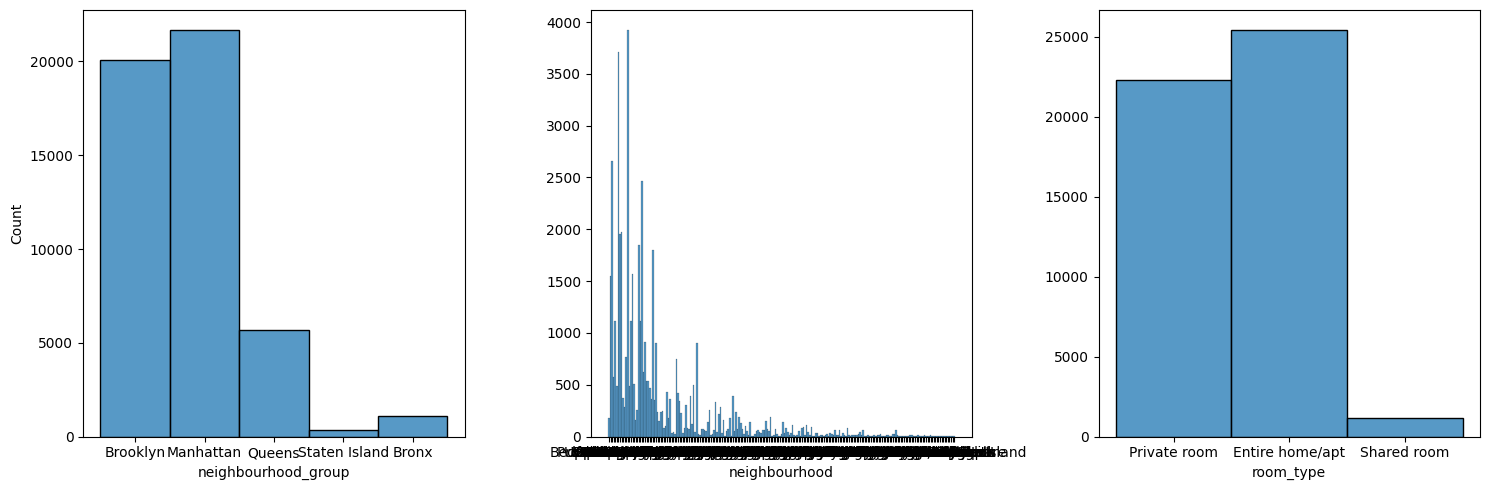

In [12]:
# Creating histplot for the categorical variables
fig, axis = plt.subplots(ncols= 3, figsize = (15, 5))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = df, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = df, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[2], data = df, x = "room_type").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### 3.1.1 Conclusions about categorical variable
- **neighbourhood_group**, Manhattan and Brooklyn clearly dominate the NYC Airbnb market. The "Long Tail": Queens has a significant presence, but Staten Island and the Bronx are very small in comparison.
- **room_type**, "Entire home/apt" is the most popular listing type, closely followed by "Private room."
- **neighbourhood**, The middle chart is very "noisy" because there are over 200 neighborhoods. This confirms that this variable is too granular to visualize effectively in a basic histogram.

## 3.2 Analysis on numeric variables

In [13]:
# Select only columns with 'int or float' data type (numeric)
numerics = df.select_dtypes(include=['number']).columns.tolist()
print(f"Numeric variables: {numerics}")

Numeric variables: ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


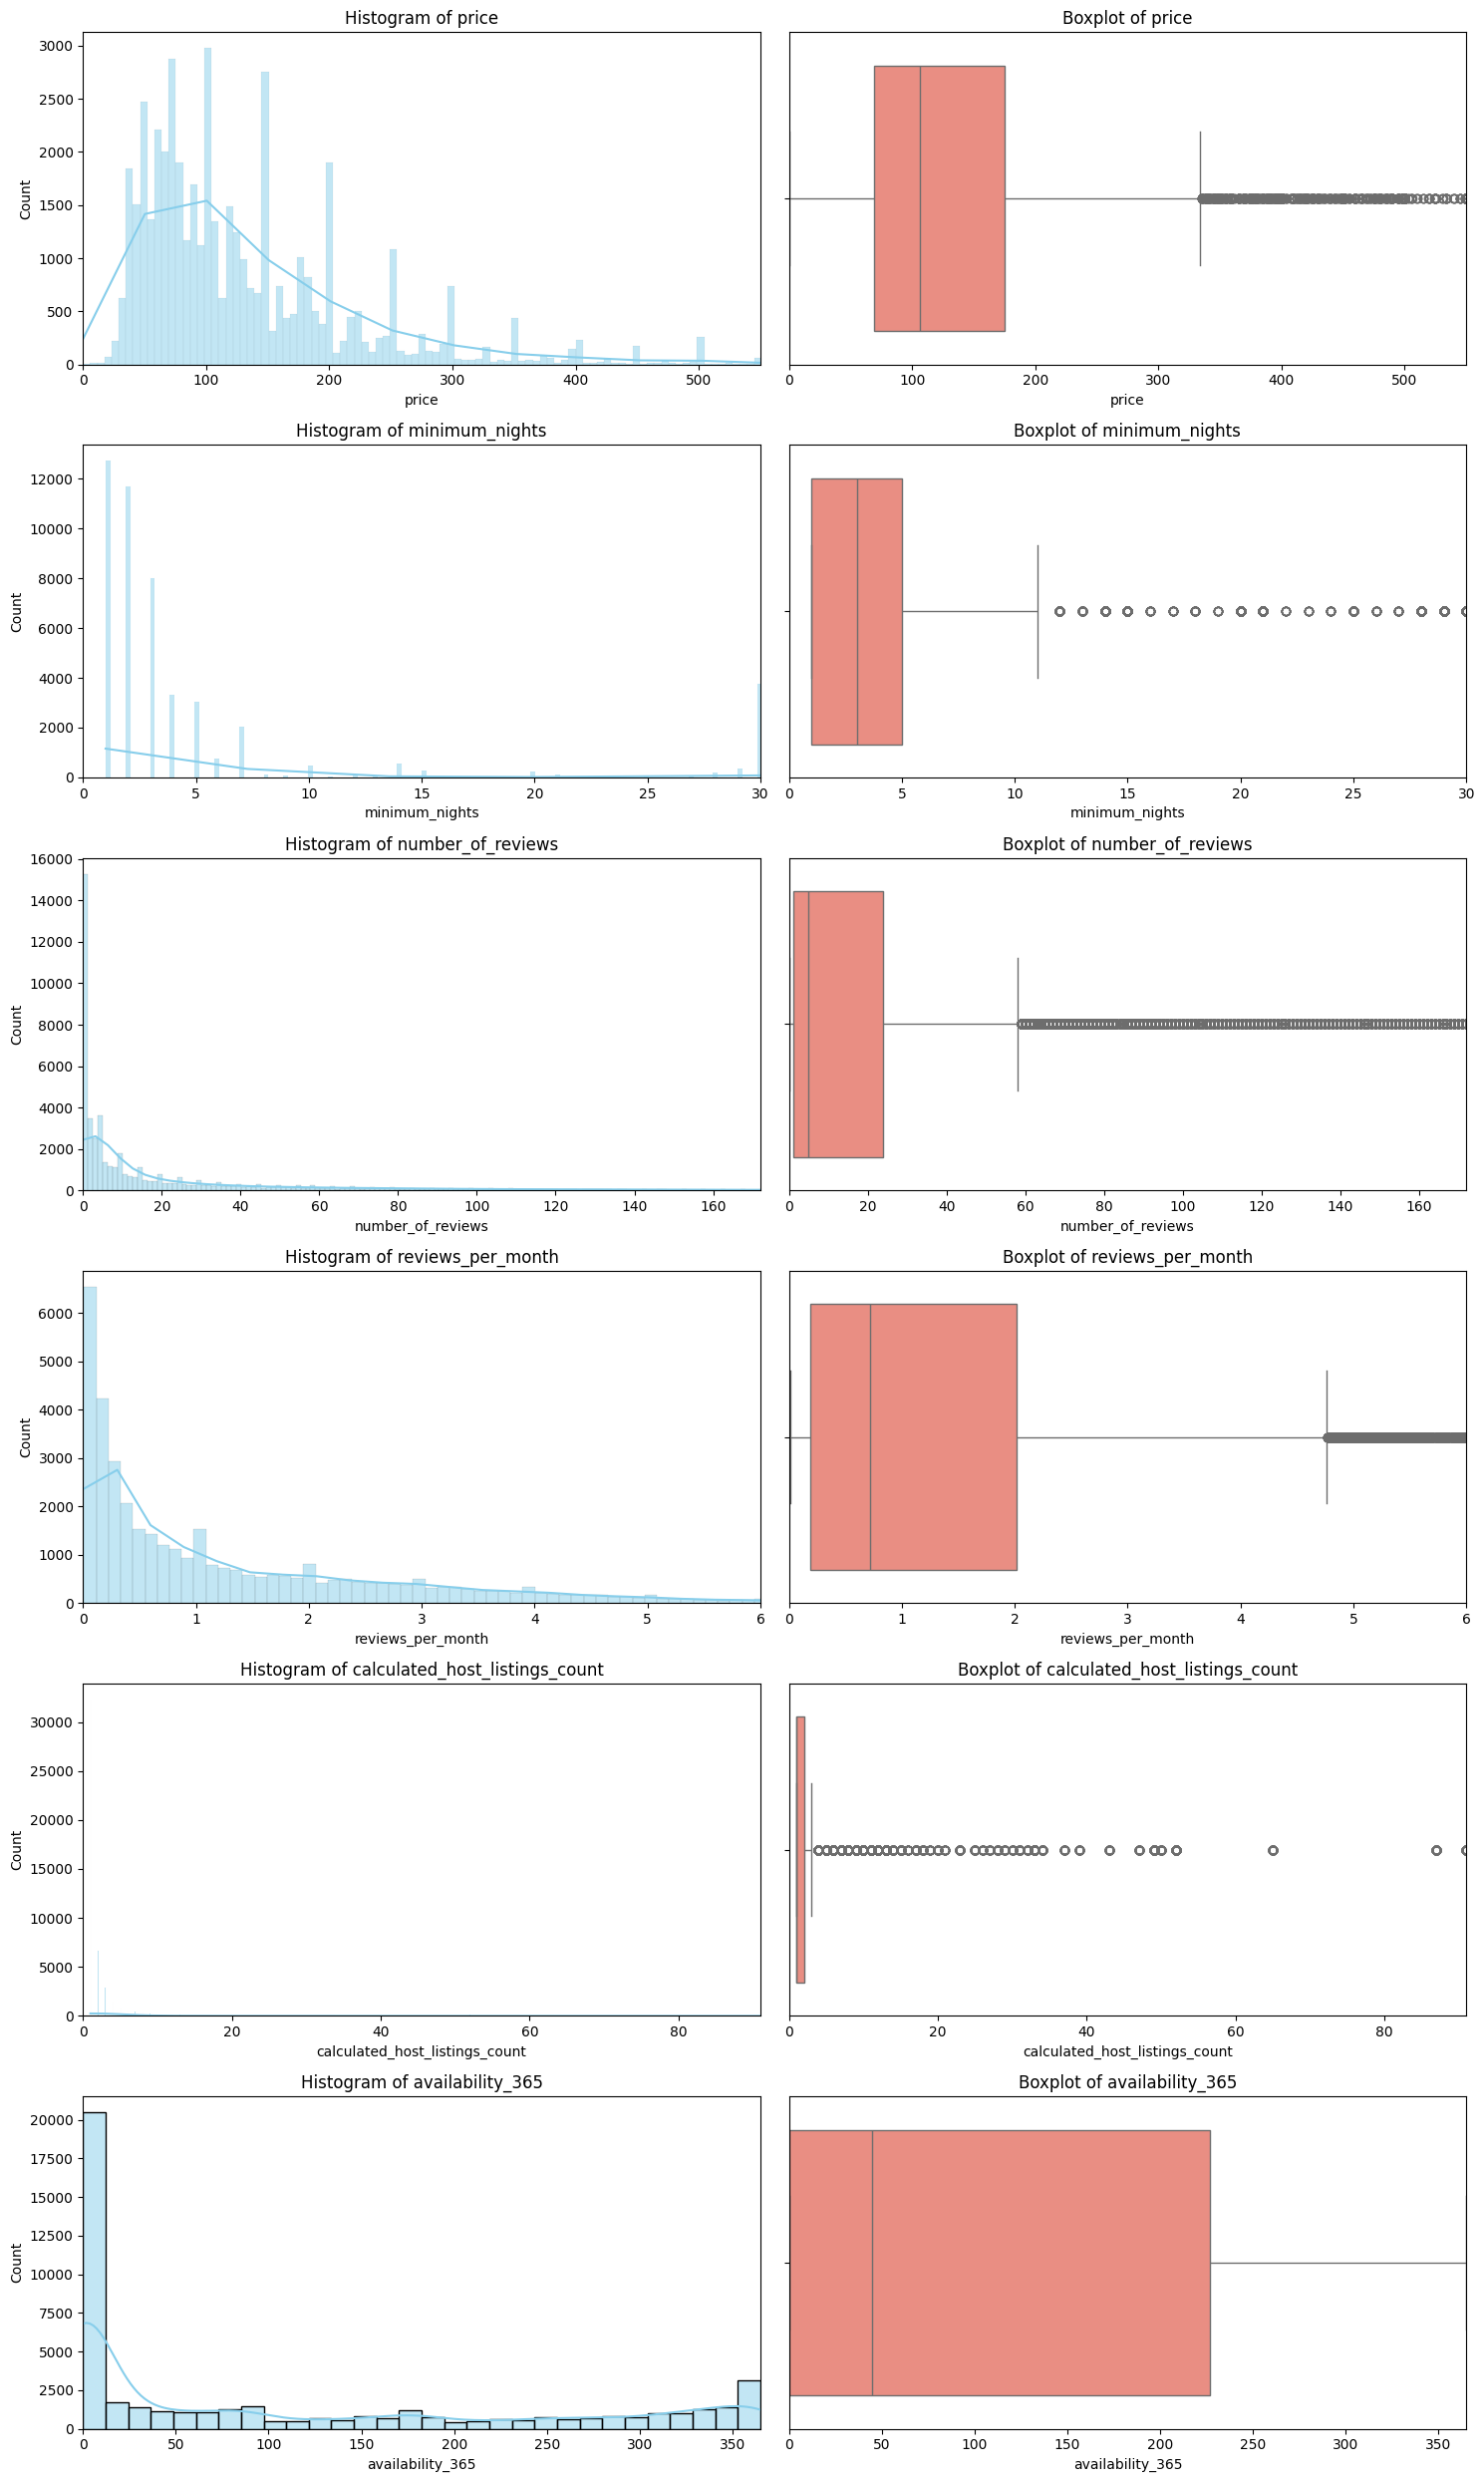

In [14]:
# Creating histplot and boxplot for the numeric variables
fig, axes = plt.subplots(nrows=len(numerics), ncols=2, figsize=(15, 25))

for i, col in enumerate(numerics):
    filtered = df[col].quantile(0.98) # This ignores the top 2% of extreme values just for better charts view
    
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_xlim(0, filtered) # <--- I will "zooms in" the X-axis
    axes[i, 0].set_title(f'Histogram of {col}')
    
    sns.boxplot(x=df[col], ax=axes[i, 1], color="salmon") # Note: I plot the full data but 'zoom' the view
    axes[i, 1].set_xlim(0, filtered)
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### 3.2.1 Conclusions for numerical variable charts
- The price histogram is heavily "squashed" to the left. This indicates that while most listings are affordable, a few extreme outliers (up to $10,000) are distorting the scale.
- Minimum Nights Anomalies: Most people stay 1–3 nights, but the boxplot shows several listings requiring over 1,000 nights.
- The availability_365 chart shows two peaks (bimodal): many listings have 0 availability (possibly inactive or fully booked), while another group is available almost year-round.
- The calculated_host_listings_count reveals that while most hosts are 1 listin), there are mega-hosts managing over 300 properties.

# Step 4: Analysis of multivariate variables
## 4.1 Numerical-numerical analysis

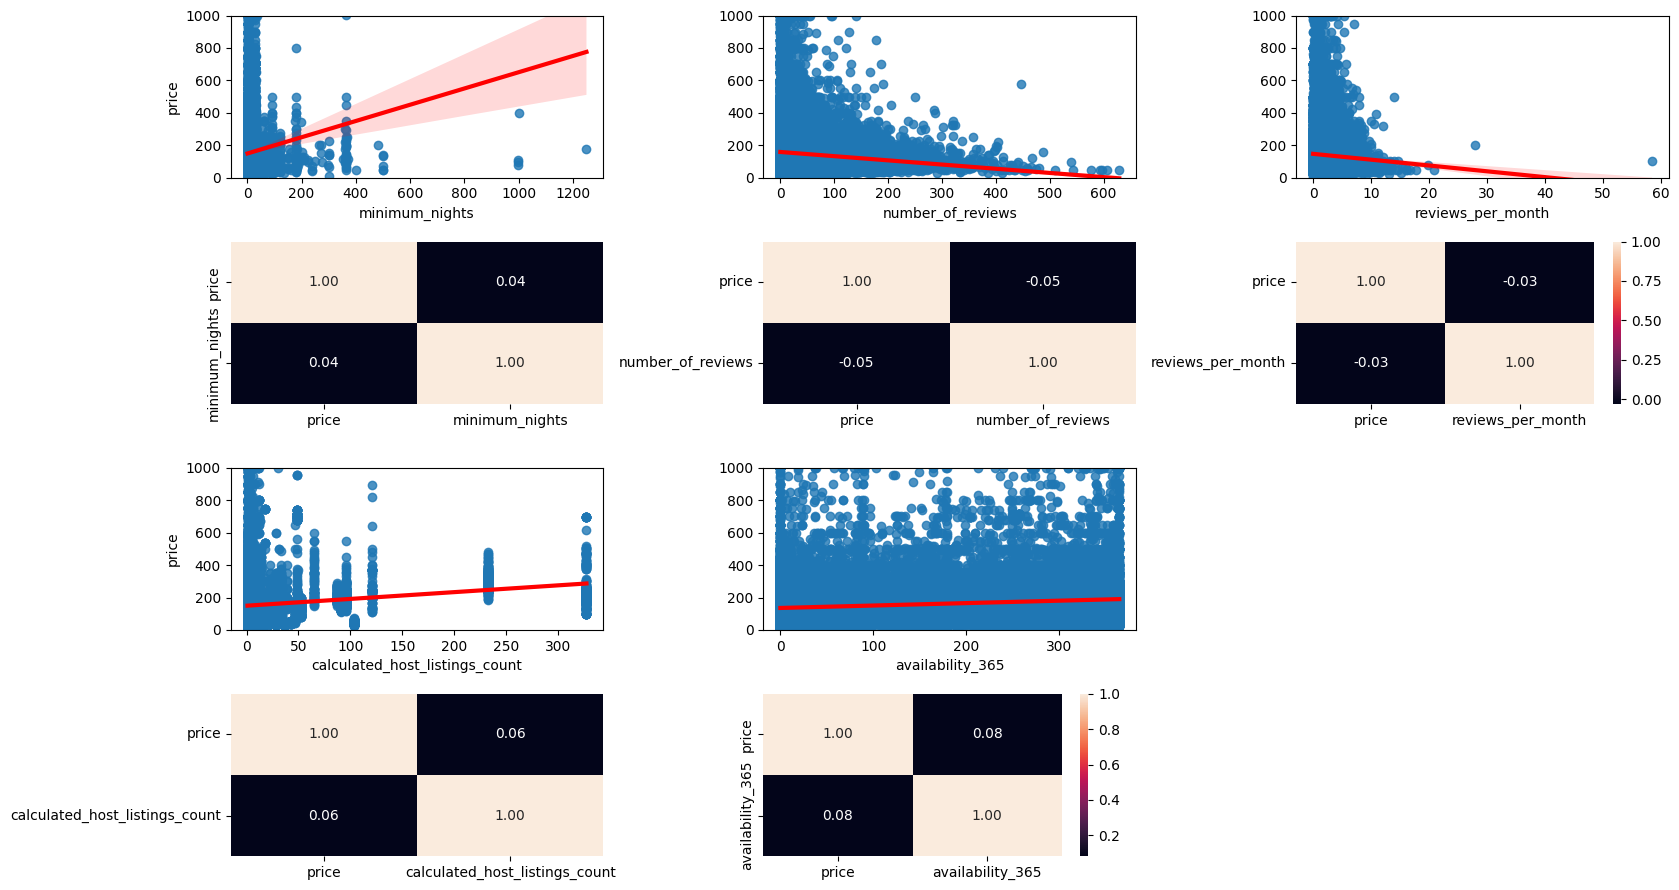

In [15]:
# Creating regplot and heatmap for the numeric variables and check the correlations
fig, axis = plt.subplots(4, 3, figsize = (17, 9))
price_limit = 1000  # Define a limit for the Y-axis (Price) to improve visibility

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price", line_kws= {"color": "red", "lw": 3}).set(ylim= (0, price_limit))
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price", line_kws= {"color": "red", "lw": 3}).set(ylabel=None, ylim= (0, price_limit))
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[0, 2], data = df, x = "reviews_per_month", y = "price", line_kws= {"color": "red", "lw": 3}).set(ylabel=None, ylim= (0, price_limit))
sns.heatmap(df[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])
sns.regplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count", y = "price", line_kws= {"color": "red", "lw": 3}).set(ylim= (0, price_limit))
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = df, x = "availability_365", y = "price", line_kws= {"color": "red", "lw": 3}).set(ylabel=None, ylim= (0, price_limit))
sns.heatmap(df[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

# Ajustar el layout
plt.tight_layout()

axis[2, 2].set_visible(False)
axis[3, 2].set_visible(False)

# Mostrar el plot
plt.show()

### 4.1.1 Conclusion on numerical - numerical
- Extreme Outliers, The Boxplots for price and minimum_nights show significant outliers. Some prices reach $10,000, and some minimum stays exceed 1,000 nights.
- Heavy Right Skew: Most variables (price, reviews, host counts) are heavily right-skewed. This means the "average" is heavily influenced by a few high-value listings.
- Bimodal Availability: availability_365 shows a unique "U-shape." Many listings are either never available (0 days, likely inactive) or always available (365 days).

I will also check the relation between number_of_reviews vs. availability_365 using the same chart analysis

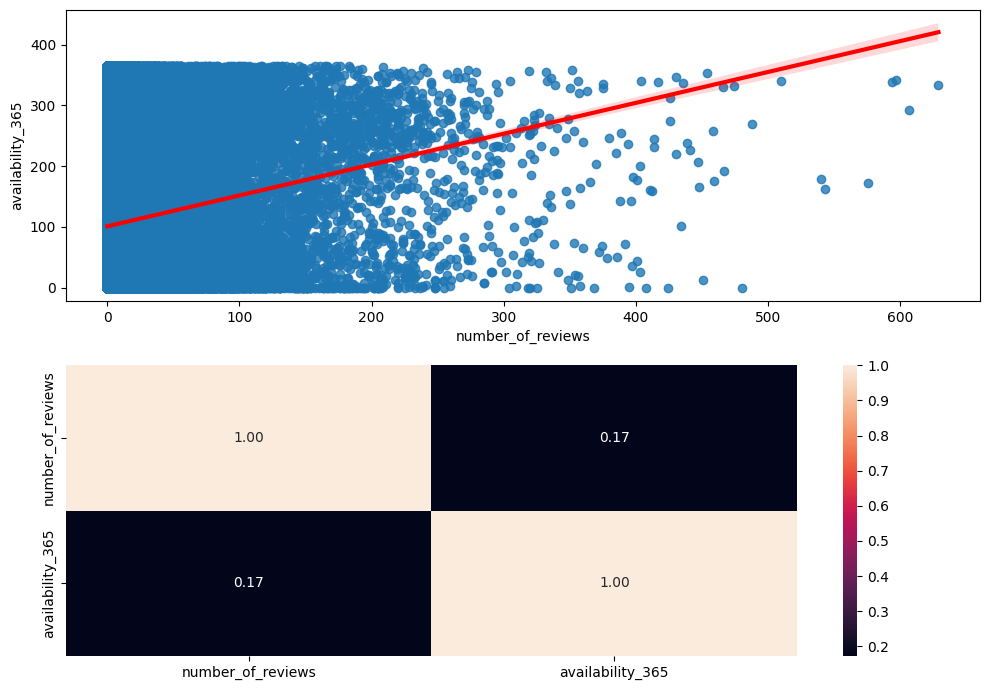

In [16]:
fig, axis = plt.subplots(nrows= 2, figsize = (10, 7))

sns.regplot(ax= axis[0], data = df, x = "number_of_reviews", y = "availability_365", line_kws= {"color": "red", "lw": 3}) 
sns.heatmap(df[["number_of_reviews", "availability_365"]].corr(), annot = True, fmt = ".2f", ax= axis[1])

plt.tight_layout()
plt.show()

**Conclusion:** The correlation of 0.17 shows a very slight positive trend—listings that are open more days tend to have slightly more reviews—but it is still a weak relationship.

## 4.2 Categorical-categorical analysis

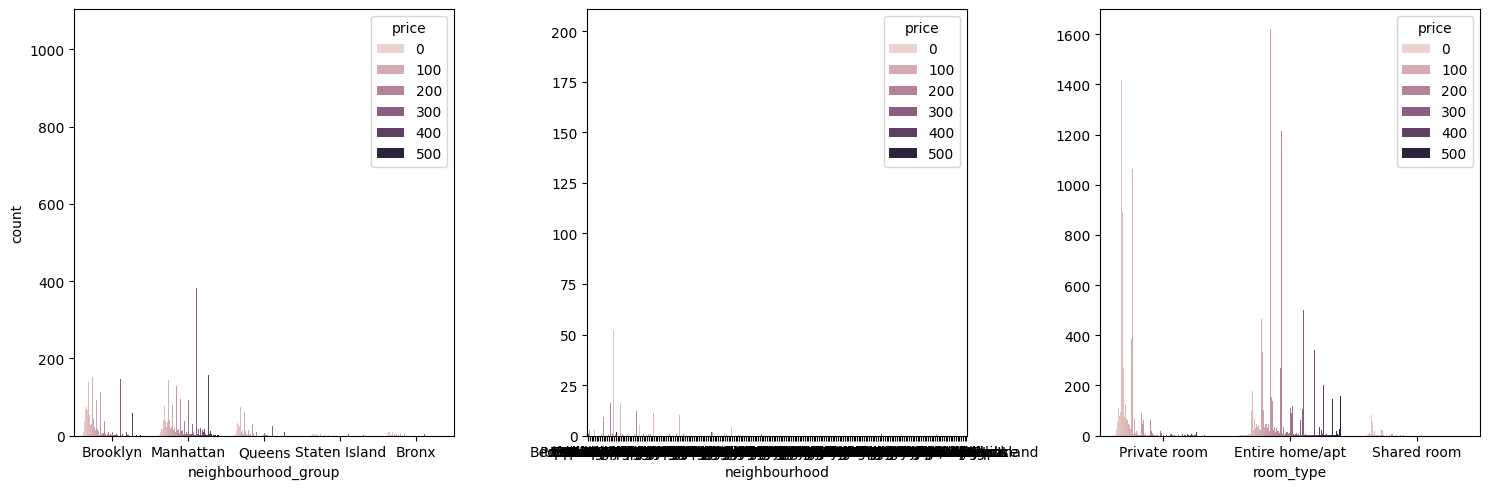

In [17]:
# Creating countplot for the categorical variables
fig, axis = plt.subplots(ncols= 3, figsize = (15, 5))
df_filtered_price = df[df['price'] <= 500].copy() # Filtering price for better visibility on the charts and made a .copy() to avoid any mistake with original df dataset.

sns.countplot(ax = axis[0], data = df_filtered_price, x = "neighbourhood_group", hue = "price")
sns.countplot(ax = axis[1], data = df_filtered_price, x = "neighbourhood", hue = "price").set(ylabel = None)
sns.countplot(ax = axis[2], data = df_filtered_price, x = "room_type", hue = "price").set(ylabel = None)

plt.tight_layout()
plt.show()

/tmp/ipykernel_719/1817320213.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='neighbourhood_group', y='price', palette='viridis')


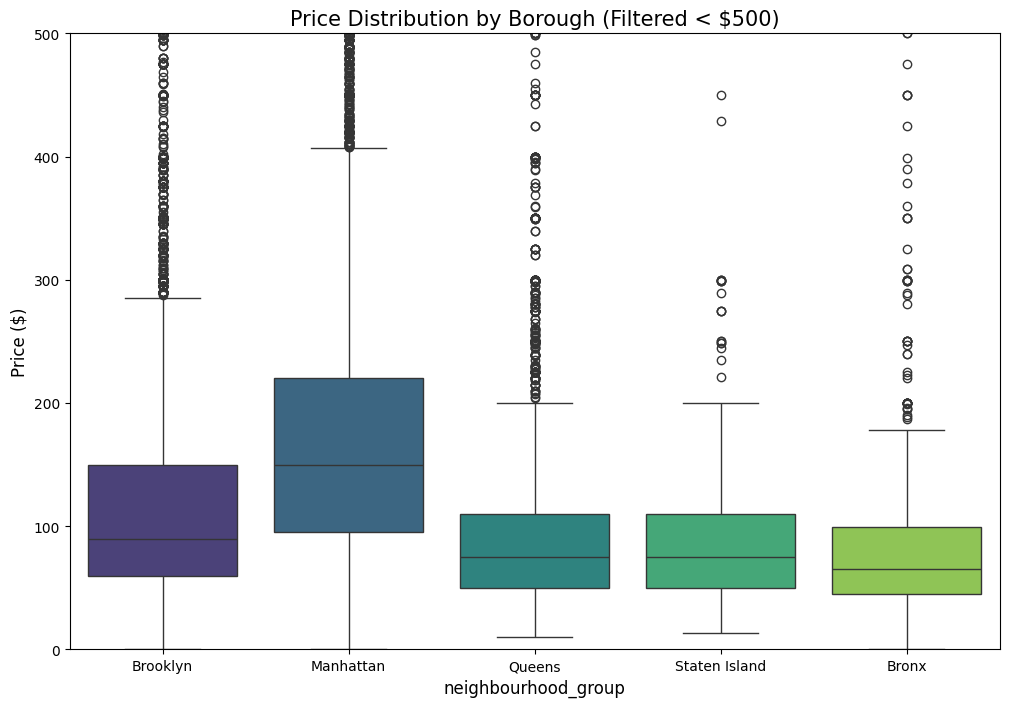

In [18]:
plt.figure(figsize=(12, 8))

# We use a limit of $500 to focus on the "normal" market range
sns.boxplot(data=df, x='neighbourhood_group', y='price', palette='viridis')

plt.ylim(0, 500) # This "zooms in" so the boxes are readable
plt.title('Price Distribution by Borough (Filtered < $500)', fontsize=15)
plt.xlabel('neighbourhood_group', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

plt.show()

### 4.2.1 Conclusion on categorical - categorical analysis
- **Neighbourhood Group vs. Price**, the vast majority of listings fall into the lowest price category (darkest bars). However, Manhattan shows a much "thicker" distribution of bars across different price levels.
- **Room Type vs. Price**, "Entire home/apt" shows the most significant price variation. "Private rooms" and "Shared rooms" are almost entirely concentrated in the lowest price bracket.
- **Neighbourhood vs. Price**, this chart highlights "Listing Density." A few specific neighborhoods have massive amounts of listings, but nearly all of them are concentrated in the lower price brackets.

## 4.3 Combinations of room_type with various predictors

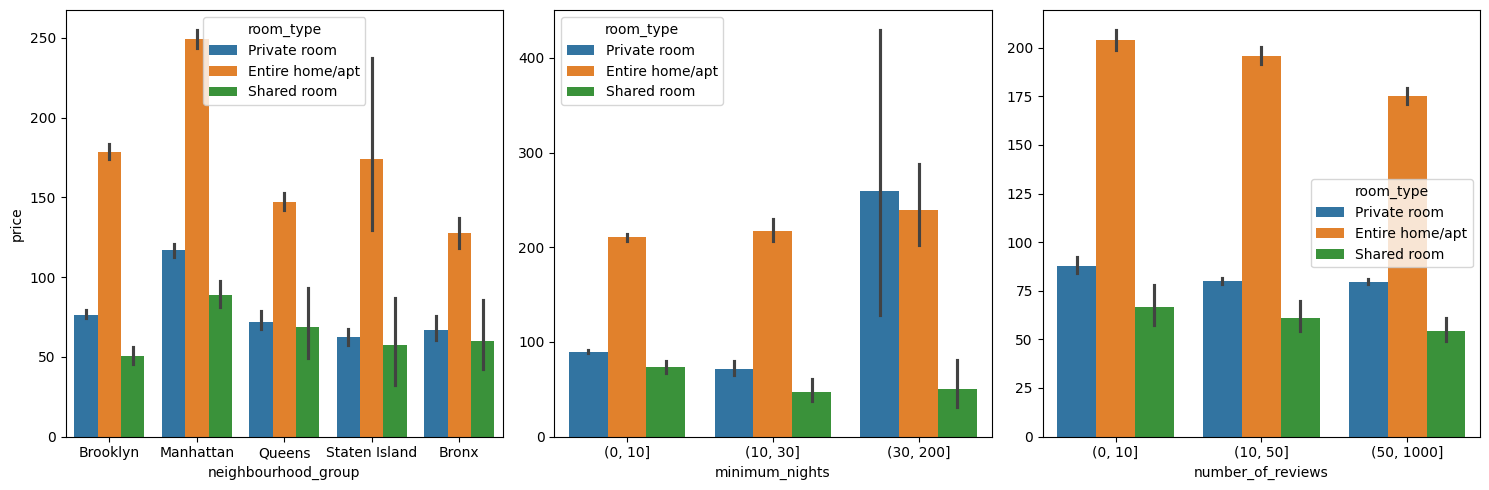

In [19]:
# Creating barplot charts with various predictors
fig, axis = plt.subplots(figsize = (15, 5), ncols = 3)

sns.barplot(ax = axis[0], data = df, x = "neighbourhood_group", y = "price", hue = "room_type")
sns.barplot(ax = axis[1], x = pd.cut(df['minimum_nights'], bins= [0, 10, 30, 200]), y = df["price"], hue = df["room_type"]).set(ylabel = None) # I used bins to make the charts so much more effectives
sns.barplot(ax = axis[2], x= pd.cut(df['number_of_reviews'], bins=[0, 10, 50, 1000]), y=df['price'], hue=df['room_type']).set(ylabel = None)

plt.tight_layout()

plt.show()

### 4.3.1 Conclusion about variable combination
- **Entire Home**, Across every neighbourhood and every review category, "Entire home/apt" consistently commands the highest price.
- **Manhattan**,  is clearly the most expensive for all room types, followed by Brooklyn. Staten Island and the Bronx show much higher uncertainty (large black error bars), likely due to having fewer listings in the dataset.
- **Price vs. Popularity**, Interestingly, the right-most chart shows that as the number of reviews increases, the average price actually decreases slightly. This suggests that "viral" or highly reviewed listings might stay popular by keeping their prices more competitive.
- **minimum_nights**, listings in the (30, 200] bin show high price volatility. This likely represents long-term luxury rentals.

## 4.4 Correlation analysis
In order to seize all variable in a heatmap plot analysis, I will factorize categorical variables and save them in a json.
Categorical variables: ['neighbourhood_group', 'neighbourhood', 'room_type']

In [20]:
# Categorical factorization
categorical_num = ['neighbourhood_group_num', 'neighbourhood_num', 'room_type_num']
for col in categorical_num:
    no_num_col = col[:-4]
    df[str(col)] = pd.factorize(df[no_num_col])[0]
# Visibility of the last loop to see factorization
print(tabulate(df[[no_num_col, col]].head(), headers='keys', tablefmt='psql'))

+----+-----------------+-----------------+
|    | room_type       |   room_type_num |
|----+-----------------+-----------------|
|  0 | Private room    |               0 |
|  1 | Entire home/apt |               1 |
|  2 | Private room    |               0 |
|  3 | Entire home/apt |               1 |
|  4 | Entire home/apt |               1 |
+----+-----------------+-----------------+


## 4.5 Saving the json dictionaries from factorization

In [21]:
# Save the json
prefix_name = '_transformation_rules'
for col in categorical_num:
    no_num_col = col[:-4]
    file_name = no_num_col + prefix_name + ".json"
    factorized_dict = {row[no_num_col]: row[col] for index, row in df[[col, no_num_col]].drop_duplicates().iterrows()}
    with open("../data/interim/" + file_name, "w") as f:
        json.dump(factorized_dict, f)

## 4.6 Numerical-categorical analysis (complete)

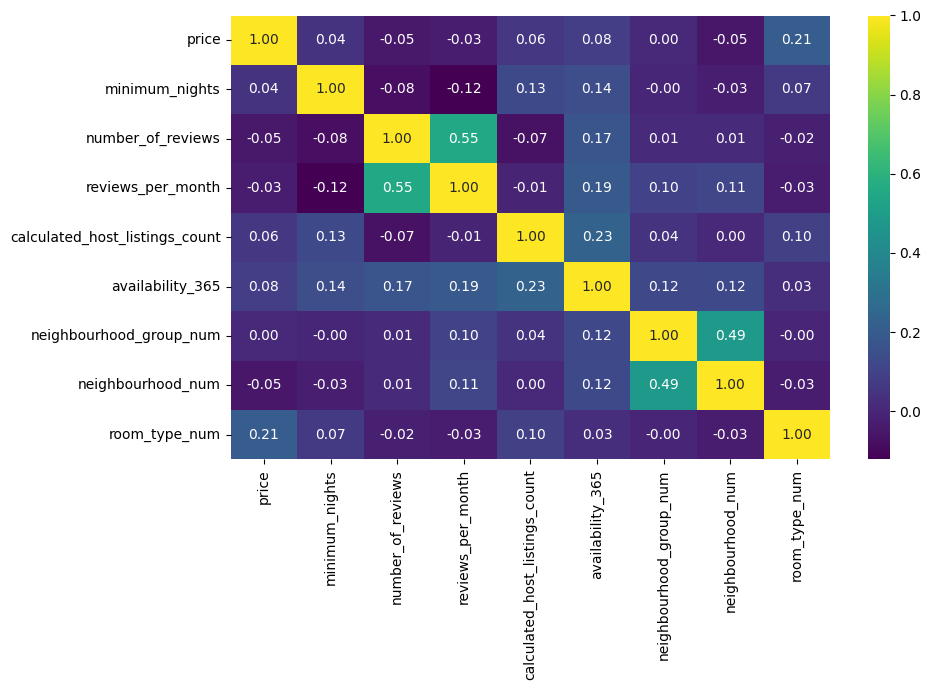

In [22]:
# Creating heatmap chart to analyze complete variables correlation
cols_num = df.select_dtypes(include=['number']).columns.tolist()
fig, ax = plt.subplots(figsize= (10, 7))
sns.heatmap(df[cols_num].corr(method="pearson"), annot=True, fmt=".2f", cmap="viridis", ax=ax)
plt.tight_layout()
plt.show()

### 4.6.1 Conclusion correlation heatmap
- **Room Type**, (0.21) Out of all the variables, room_type_num still holds the strongest positive relationship with price.
- **Location Factorization**, Both neighbourhood_group_num ($0.00$) and neighbourhood_num ($-0.05$) show almost no linear relationship with price. However, notice the 0.49 correlation shows that certain neighborhoods belong to specific groups.
- **Review**, (0.55): There is a strong relationship between number_of_reviews and reviews_per_month. This validates the data; listings that have been around a long time and have many reviews are still the ones getting booked and reviewed frequently.
- **Host Behavior Availability vs. Listings**,  (0.23): There is a positive link between calculated_host_listings_count and availability_365. Hosts with more properties tend to keep them available more often throughout the year.

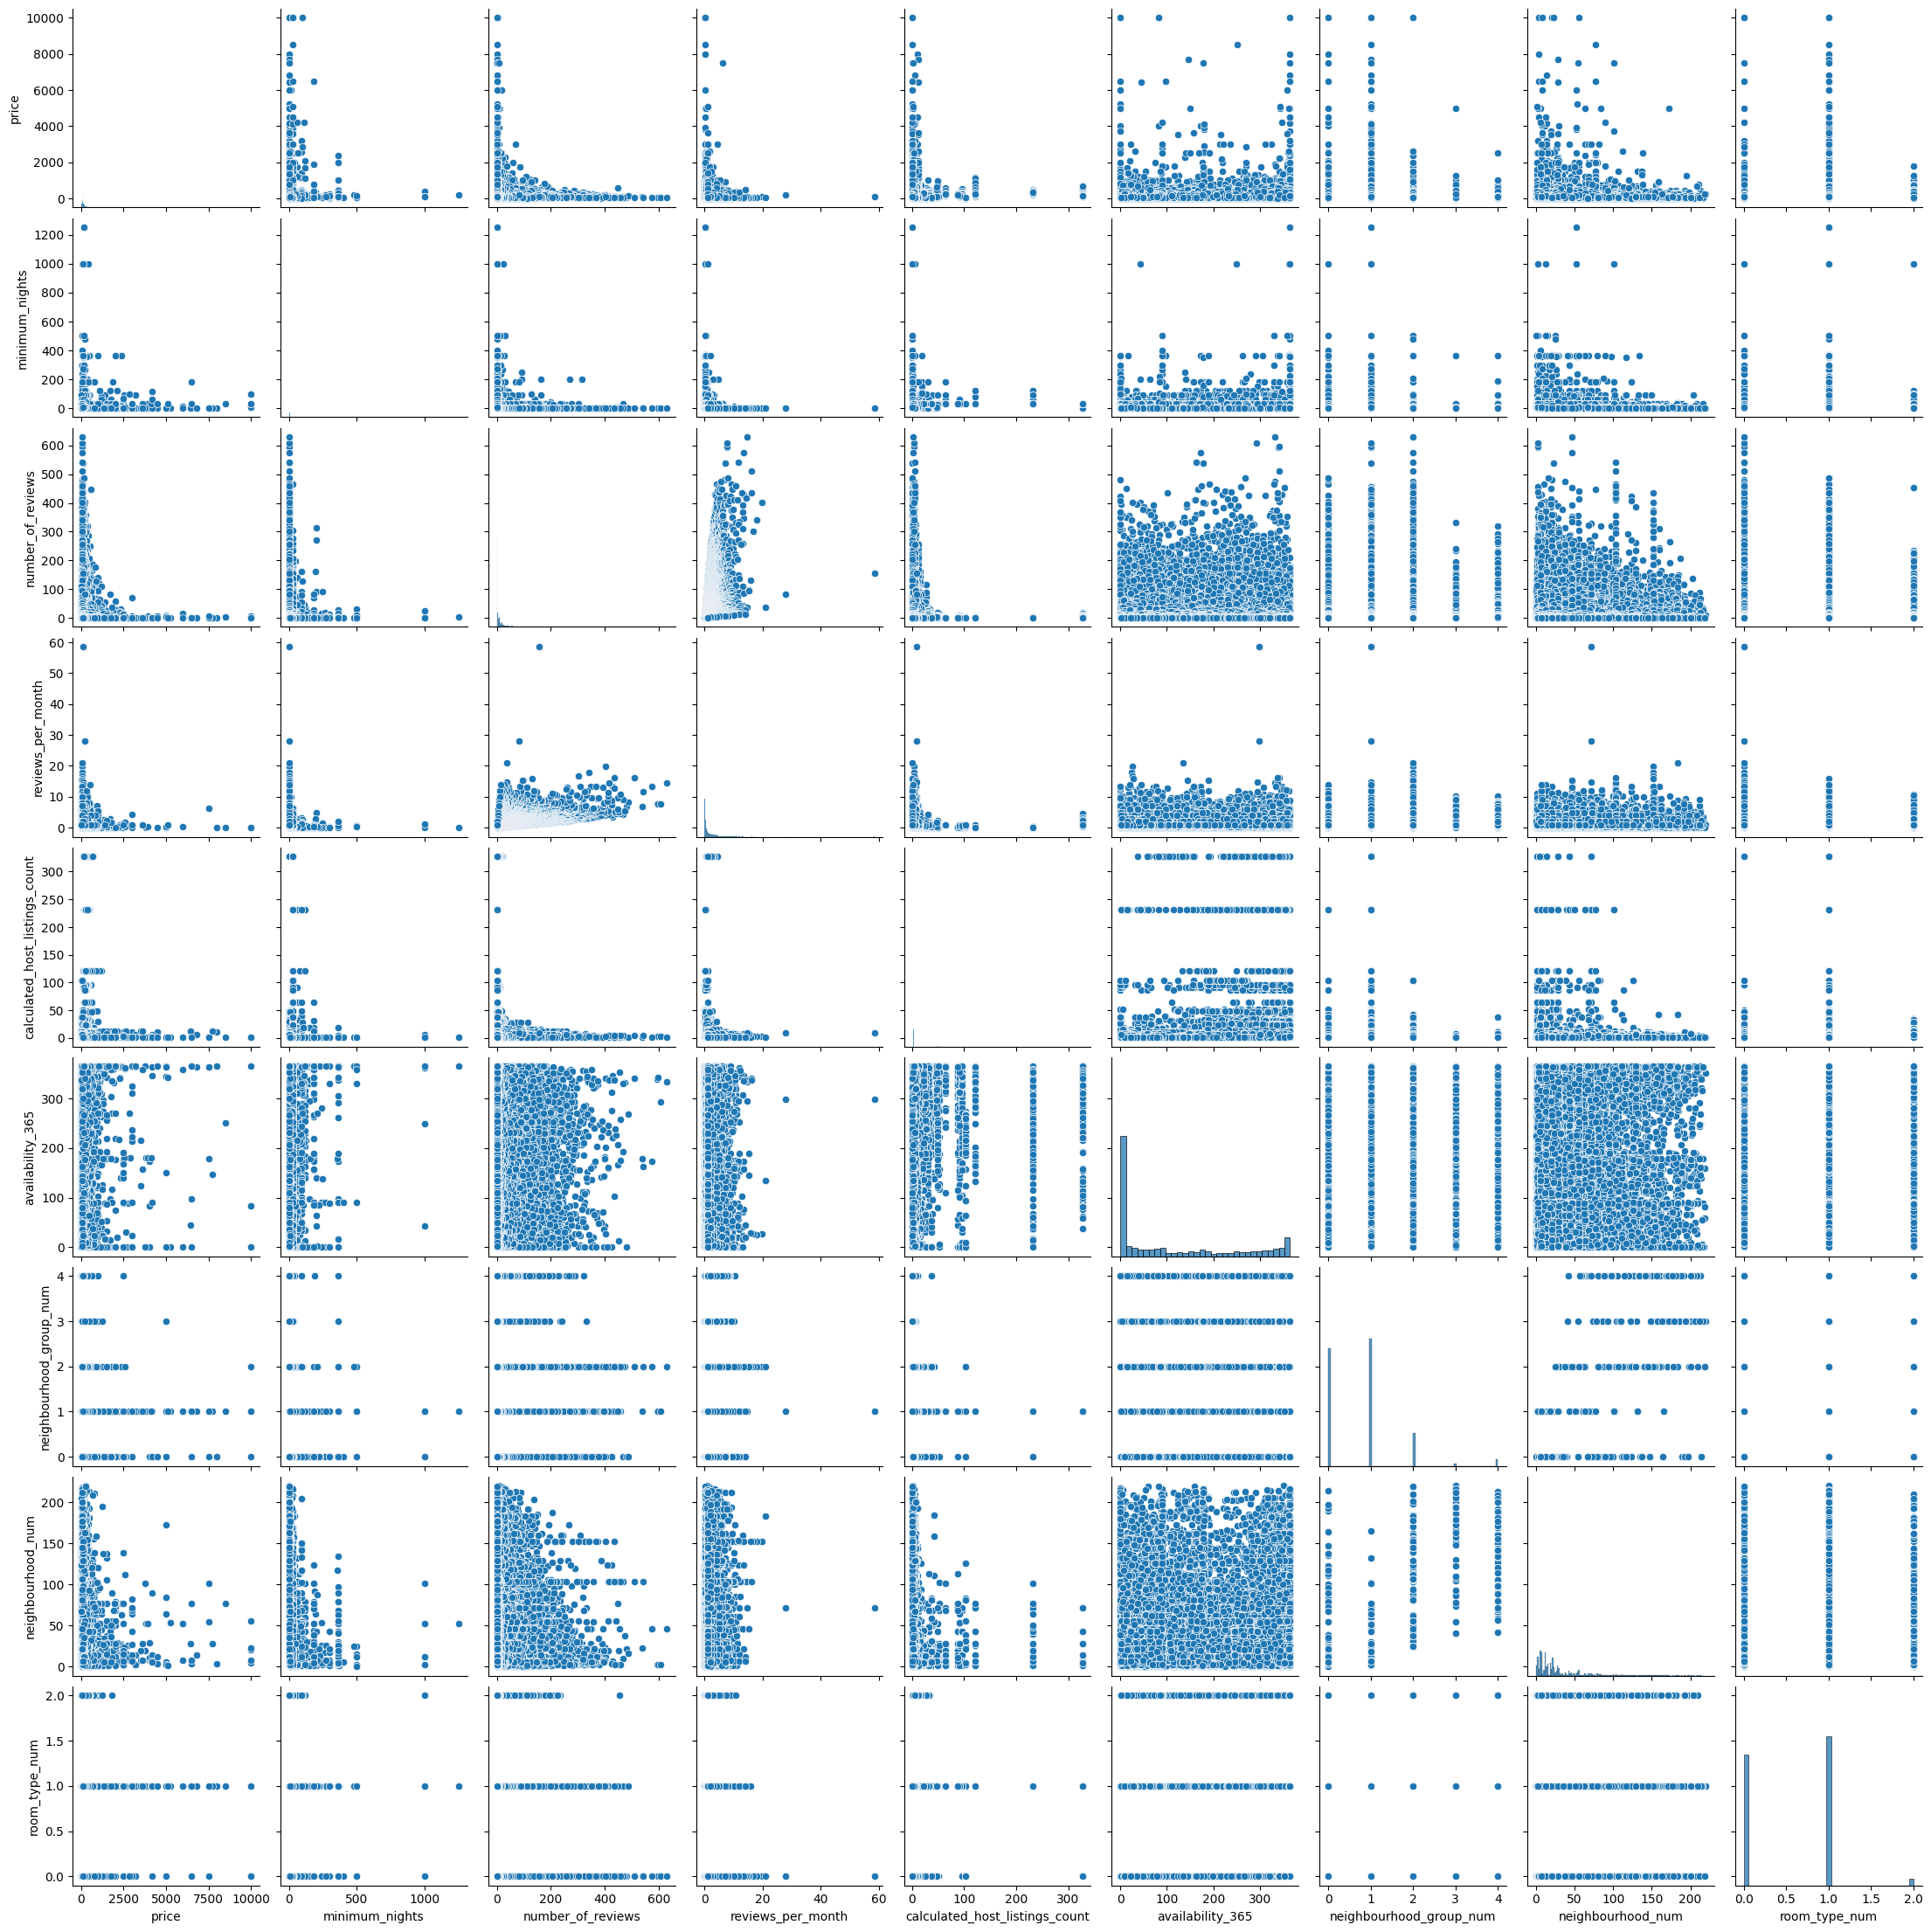

In [23]:
# Creating pairplot to have a variables behaviour visibility 
sns.pairplot(data= df)

**Technical analysis** of how these variables below interact.

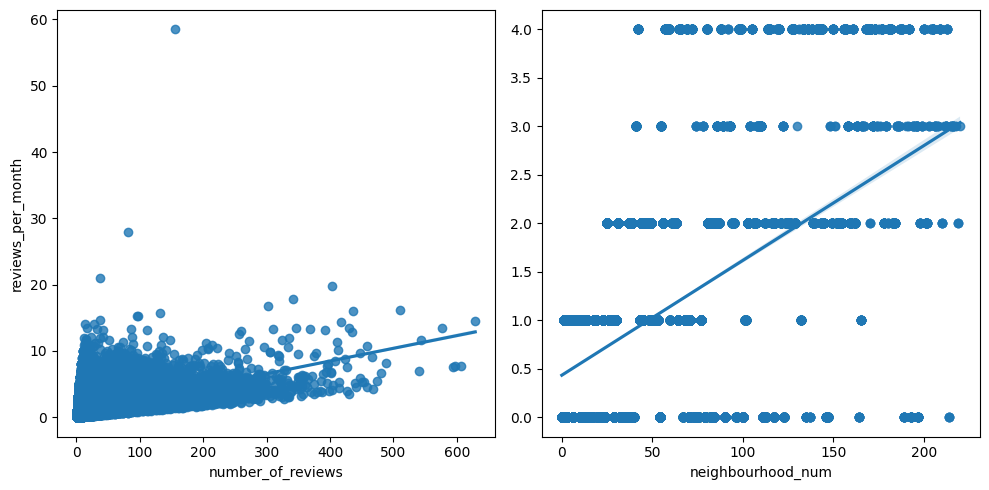

In [24]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = df, x = "number_of_reviews", y = "reviews_per_month")
sns.regplot(ax = axis[1], data = df, x = "neighbourhood_num", y = "neighbourhood_group_num").set(ylabel = None)

plt.tight_layout()

plt.show()

**Left Chart:** Total Reviews vs. Reviews Per Month. There is a clear, positive correlation 0.55. Listings with a high total count of reviews are not just "old" properties that have been around forever; they are currently active and being booked frequently.
**Right Chart:** Neighbourhood vs. Neighbourhood Group. There is a positive correlation $0.49. This confirms that factorization worked correctly. Because neighborhoods are nested inside groups, the "strips" of dots show groups of neighborhoods. The regression line is possitive and follows the neighbourhood_group_num.

# Step 5: Feature engineering
## 5.1 Outlier analysis

In [25]:
# Final columns to start the feature engineering analysis
final_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_num', 'neighbourhood_num', 'room_type_num']
df = df[final_cols]

In [26]:
print(tabulate(df.describe(), headers= "keys", tablefmt= "psql"))

+-------+-----------+------------------+---------------------+---------------------+----------------------------------+--------------------+---------------------------+---------------------+-----------------+
|       |     price |   minimum_nights |   number_of_reviews |   reviews_per_month |   calculated_host_listings_count |   availability_365 |   neighbourhood_group_num |   neighbourhood_num |   room_type_num |
|-------+-----------+------------------+---------------------+---------------------+----------------------------------+--------------------+---------------------------+---------------------+-----------------|
| count | 48895     |      48895       |          48895      |         38843       |                      48895       |          48895     |              48895        |          48895      |    48895        |
| mean  |   152.721 |          7.02996 |             23.2745 |             1.37322 |                          7.14398 |            112.781 |                  0.7869

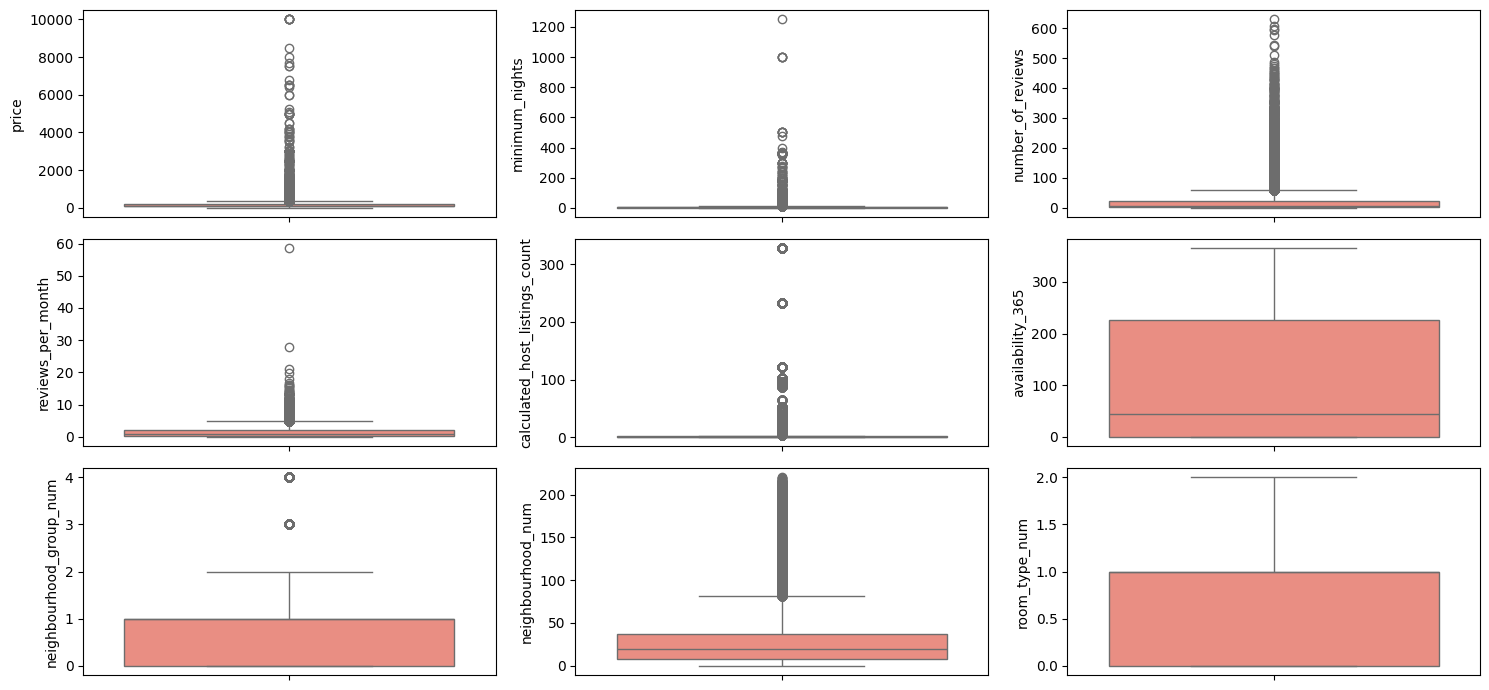

In [27]:
# Creating boxplot to understand the outliers in each variable 
fig, axes = plt.subplots(nrows= 3, ncols= 3, figsize= (15, 7))

axes = axes.flatten()
for i, col in enumerate(final_cols):
    sns.boxplot(data= df, y= col, ax= axes[i], color= 'salmon')
for j in range(len(final_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 5.1.1 Conclusion on the boxplots charts
- The "Heavy Outlier" Group (price, minimum_nights, reviews_per_month)
- High-Volume Activity (number_of_reviews, calculated_host_listings_count) and shows outliers with over 300 listings.
- Balanced Distributions (availability_365, room_type_num). Categorical Numbers: neighbourhood_group_num and room_type_num show clean. The "outliers" just represent the less frequent categories in the factorized list.

In [28]:
# Necessary coding to replace outliers creating upper and lower limits
# SAVING ALL DATASETS.

df_WITH_outliers = df.copy()
df_WITHOUT_outliers = df.copy() # This need to be modified. For every variable with outliers, I will replce outliers values.

outliers_cols = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count'] # The target variable price can't be modified so we leave as it is.

def replace_outliers(column, data_df):
  col_stats = df[column].describe()
  col_iqr = col_stats["75%"] - col_stats["25%"]
  upper_limit = round(float(col_stats["75%"] + 1.5 * col_iqr), 2)
  lower_limit = round(float(col_stats["25%"] - 1.5 * col_iqr), 2)

  if lower_limit < 0: lower_limit = min(df[column])
  # Let's take out upper outliers 
  data_df[column] = data_df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Let's take out lower outliers 
  data_df[column] = data_df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return data_df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in outliers_cols:
  df_WITHOUT_outliers, limits = replace_outliers(column, df_WITHOUT_outliers)
  outliers_dict.update({column: limits})

outliers_dict # This jason needs to be saved

{'minimum_nights': [1, 11.0],
 'number_of_reviews': [0, 58.5],
 'reviews_per_month': [0.01, 4.77],
 'calculated_host_listings_count': [1, 3.5]}

## 5.2 Saving the json dictionary for outliers limit

In [29]:
with open('../data/interim/outliers_dict.json', 'w') as f:
    json.dump(outliers_dict, f)

## 5.3 Missing value analysis

In [30]:
print("The list below, will show if dataset WITH outliers has any null value for the variables:")
print(df_WITH_outliers.isnull().sum().sort_values(ascending= False))

The list below, will show if dataset WITH outliers has any null value for the variables:
reviews_per_month                 10052
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
neighbourhood_group_num               0
neighbourhood_num                     0
room_type_num                         0
dtype: int64


In [31]:
print("The list below, will show if dataset WITHOUT outliers has any null value for the variables:")
print(df_WITHOUT_outliers.isnull().sum().sort_values(ascending= False))

The list below, will show if dataset WITHOUT outliers has any null value for the variables:
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_num           0
neighbourhood_num                 0
room_type_num                     0
dtype: int64


To fill in the missing values in a numerical variable, normally the procedure is to use the statistical values of the sample. The most common is to import it using the mean, mode or median of that characteristic.

In [32]:
# Using numerical imputation for reviews_per_month and fill with the mean value
df_WITH_outliers['reviews_per_month'] = df_WITH_outliers['reviews_per_month'].fillna(df['reviews_per_month'].mean()) # Used when a variable is purely float
print("The list below, we have replaced the null value of reviews_per_month by the mean")
print(df_WITH_outliers.isnull().sum())

The list below, we have replaced the null value of reviews_per_month by the mean
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_num           0
neighbourhood_num                 0
room_type_num                     0
dtype: int64


## 5.4 Inference of new features
I will go with the merging availability_365 and number_of_reviews.
A listing that is available all year but has 0 reviews is likely a "dead" listing. A listing available only 30 days a year with 50 reviews is a "hot" listing.

In [33]:
df_WITH_outliers['activity_index'] = df_WITH_outliers['number_of_reviews'] / (df_WITH_outliers['availability_365'] + 1) # the +1 is just to avoid any error by dividing by zero
df_WITHOUT_outliers['activity_index'] = df_WITHOUT_outliers['number_of_reviews'] / (df_WITHOUT_outliers['availability_365'] + 1)


In [34]:
print("Table with new column activity_index. It combines a ratio with both number_of_reviews & availability_365.\nWITH outliers:")
print(tabulate(df_WITH_outliers.head(), headers= "keys", tablefmt= "psql"))

Table with new column activity_index. It combines a ratio with both number_of_reviews & availability_365.
WITH outliers:
+----+---------+------------------+---------------------+---------------------+----------------------------------+--------------------+---------------------------+---------------------+-----------------+------------------+
|    |   price |   minimum_nights |   number_of_reviews |   reviews_per_month |   calculated_host_listings_count |   availability_365 |   neighbourhood_group_num |   neighbourhood_num |   room_type_num |   activity_index |
|----+---------+------------------+---------------------+---------------------+----------------------------------+--------------------+---------------------------+---------------------+-----------------+------------------|
|  0 |     149 |                1 |                   9 |             0.21    |                                6 |                365 |                         0 |                   0 |               0 |       

In [35]:
print("Table with new column activity_index. It combines a ratio with both number_of_reviews & availability_365.\nWITHOUT outliers:")
print(tabulate(df_WITHOUT_outliers.head(), headers= "keys", tablefmt= "psql"))

Table with new column activity_index. It combines a ratio with both number_of_reviews & availability_365.
WITHOUT outliers:
+----+---------+------------------+---------------------+---------------------+----------------------------------+--------------------+---------------------------+---------------------+-----------------+------------------+
|    |   price |   minimum_nights |   number_of_reviews |   reviews_per_month |   calculated_host_listings_count |   availability_365 |   neighbourhood_group_num |   neighbourhood_num |   room_type_num |   activity_index |
|----+---------+------------------+---------------------+---------------------+----------------------------------+--------------------+---------------------------+---------------------+-----------------+------------------|
|  0 |     149 |                1 |                 9   |                0.21 |                              3.5 |                365 |                         0 |                   0 |               0 |    

## 5.5 Feature scaling

In [36]:
# Divide the set into train and test

# df_WITH_outliers 
# df_WITHOUT_outliers 
				
predictors = ["minimum_nights", "reviews_per_month", "calculated_host_listings_count", "neighbourhood_group_num", "neighbourhood_num", "room_type_num", "activity_index"]
target = "price"

X_WITH_outliers = df_WITH_outliers.drop(target, axis = 1)[predictors]
X_WITHOUT_outliers = df_WITHOUT_outliers.drop(target, axis = 1)[predictors]
y = df_WITH_outliers[target]

X_train_WITH_outliers, X_test_WITH_outliers, y_train, y_test = train_test_split(X_WITH_outliers, y, test_size = 0.2, random_state = 10)
X_train_WITHOUT_outliers, X_test_WITHOUT_outliers = train_test_split(X_WITHOUT_outliers, test_size = 0.2, random_state = 10)

In [37]:
# Normalization and MIN_MAX Scaling

# X_train_WITH_outliers
# X_train_WITHOUT_outliers

# X_test_WITH_outliers
# X_test_WITHOUT_outliers

# WE NEED TO SAVE 3 OCCURRENCE: 1) DATASET PLANE (WITH NO CHANGES), 2) DATASET NORMALIZED, 3) DATASET MIN-MAX

## NORMALIZATION
### WITH OUTLIERS
norm_WITH_outliers = StandardScaler() # StandardScaler(), used to "normalize" or "resize" your data so that all your features are on the same scale. 
# .fit(), The "Learning"
norm_WITH_outliers.fit(X_train_WITH_outliers) # Phase. the scaler (or model) looks at your data and calculates the necessary parameters. It does not change the data; it only learns from it.

# .transform(), The "Applying" Phase.
# NOTE: .fit_transform() — The "Shortcut" --> This is simply a convenience method that does both steps at the same time on the same piece of data. --- Use this on your Training Data ---
X_train_WITH_outliers_norm = norm_WITH_outliers.transform(X_train_WITH_outliers) # This uses the parameters calculated during .fit() to actually modify the data.
X_train_WITH_outliers_norm = pd.DataFrame(X_train_WITH_outliers_norm, index = X_train_WITH_outliers.index, columns = predictors) # We need to convert to DataFrame the transform with this variable

X_test_WITH_outliers_norm = norm_WITH_outliers.transform(X_test_WITH_outliers)
X_test_WITH_outliers_norm = pd.DataFrame(X_test_WITH_outliers_norm, index = X_test_WITH_outliers.index, columns = predictors)

### WITHOUT OUTLIERS
norm_WITHOUT_outliers = StandardScaler()
norm_WITHOUT_outliers.fit(X_train_WITHOUT_outliers)

X_train_WITHOUT_outliers_norm = norm_WITHOUT_outliers.transform(X_train_WITHOUT_outliers)
X_train_WITHOUT_outliers_norm = pd.DataFrame(X_train_WITHOUT_outliers_norm, index = X_train_WITHOUT_outliers.index, columns = predictors)

X_test_WITHOUT_outliers_norm = norm_WITHOUT_outliers.transform(X_test_WITHOUT_outliers)
X_test_WITHOUT_outliers_norm = pd.DataFrame(X_test_WITHOUT_outliers_norm, index = X_test_WITHOUT_outliers.index, columns = predictors)


## SCALED MIN_MAX
### WITH OUTLIERS
scaler_WITH_outliers = MinMaxScaler() # MinMaxScaler is a scaling technique that transforms the data so that all values fall within a specific range, most commonly between 0 and 1.
scaler_WITH_outliers.fit(X_train_WITH_outliers)

X_train_WITH_outliers_scal = scaler_WITH_outliers.transform(X_train_WITH_outliers)
X_train_WITH_outliers_scal = pd.DataFrame(X_train_WITH_outliers_scal, index = X_train_WITH_outliers.index, columns = predictors)

X_test_WITH_outliers_scal = scaler_WITH_outliers.transform(X_test_WITH_outliers)
X_test_WITH_outliers_scal = pd.DataFrame(X_test_WITH_outliers_scal, index = X_test_WITH_outliers.index, columns = predictors)

### WITHOUT OUTLIERS
scaler_WITHOUT_outliers = MinMaxScaler()
scaler_WITHOUT_outliers.fit(X_train_WITHOUT_outliers)

X_train_WITHOUT_outliers_scal = scaler_WITHOUT_outliers.transform(X_train_WITHOUT_outliers)
X_train_WITHOUT_outliers_scal = pd.DataFrame(X_train_WITHOUT_outliers_scal, index = X_train_WITHOUT_outliers.index, columns = predictors)

X_test_WITHOUT_outliers_scal = scaler_WITHOUT_outliers.transform(X_test_WITHOUT_outliers)
X_test_WITHOUT_outliers_scal = pd.DataFrame(X_test_WITHOUT_outliers_scal, index = X_test_WITHOUT_outliers.index, columns = predictors)

# X_train_CON_outliers
# X_train_CON_outliers_norm
# X_train_CON_outliers_scal
# X_train_SIN_outliers
# X_train_SIN_outliers_norm
# X_train_SIN_outliers_scal

# X_test_CON_outliers
# X_test_CON_outliers_norm
# X_test_CON_outliers_scal
# X_test_SIN_outliers
# X_test_SIN_outliers_norm
# X_test_SIN_outliers_scal

### 5.5.1 Testing appearance and data consistency

In [38]:
print("Table with train data modified WITH outliers. Normalization of the data embedded.")
print(tabulate(X_train_WITH_outliers.head(), headers= "keys", tablefmt= "psql"))

Table with train data modified WITH outliers. Normalization of the data embedded.
+-------+------------------+---------------------+----------------------------------+---------------------------+---------------------+-----------------+------------------+
|       |   minimum_nights |   reviews_per_month |   calculated_host_listings_count |   neighbourhood_group_num |   neighbourhood_num |   room_type_num |   activity_index |
|-------+------------------+---------------------+----------------------------------+---------------------------+---------------------+-----------------+------------------|
| 13234 |                1 |                0.02 |                                4 |                         1 |                  19 |               0 |        1         |
| 45701 |                3 |                2.79 |                                1 |                         2 |                  39 |               1 |        0.036036  |
|  6524 |                4 |                0.1  |   

In [39]:
print("Table with train data modified WITHOUT outliers. MIN_MAN of the data embedded.")
print(tabulate(X_train_WITH_outliers_scal.head(), headers= "keys", tablefmt= "psql"))

Table with train data modified WITHOUT outliers. MIN_MAN of the data embedded.
+-------+------------------+---------------------+----------------------------------+---------------------------+---------------------+-----------------+------------------+
|       |   minimum_nights |   reviews_per_month |   calculated_host_listings_count |   neighbourhood_group_num |   neighbourhood_num |   room_type_num |   activity_index |
|-------+------------------+---------------------+----------------------------------+---------------------------+---------------------+-----------------+------------------|
| 13234 |       0          |         0.000170969 |                       0.00920245 |                      0.25 |           0.0863636 |             0   |      0.00208333  |
| 45701 |       0.00160128 |         0.0475295   |                       0          |                      0.5  |           0.177273  |             0.5 |      7.50751e-05 |
|  6524 |       0.00240192 |         0.00153872  |      

### 5.5.2 Saving all of the DATASET
    train, test with all the variance we have created.

In [40]:
# DATASETS that have been created so far in previous steps from the feature engineering

X_train_WITH_outliers.to_excel("../data/processed/X_train_WITH_outliers.xlsx", index = False)
X_train_WITH_outliers_norm.to_excel("../data/processed/X_train_WITH_outliers_norm.xlsx", index = False)
X_train_WITH_outliers_scal.to_excel("../data/processed/X_train_WITH_outliers_scal.xlsx", index = False)
X_train_WITHOUT_outliers.to_excel("../data/processed/X_train_WITHOUT_outliers.xlsx", index = False)
X_train_WITHOUT_outliers_norm.to_excel("../data/processed/X_train_WITHOUT_outliers_norm.xlsx", index = False)
X_train_WITHOUT_outliers_scal.to_excel("../data/processed/X_train_WITHOUT_outliers_scal.xlsx", index = False)

X_test_WITH_outliers.to_excel("../data/processed/X_test_WITH_outliers.xlsx", index = False)
X_test_WITH_outliers_norm.to_excel("../data/processed/X_test_WITH_outliers_norm.xlsx", index = False)
X_test_WITH_outliers_scal.to_excel("../data/processed/X_test_WITH_outliers_scal.xlsx", index = False)
X_test_WITHOUT_outliers.to_excel("../data/processed/X_test_WITHOUT_outliers.xlsx", index = False)
X_test_WITHOUT_outliers_norm.to_excel("../data/processed/X_test_WITHOUT_outliers_norm.xlsx", index = False)
X_test_WITHOUT_outliers_scal.to_excel("../data/processed/X_test_WITHOUT_outliers_scal.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

# SCALERS --> Saving the models

with open("../models/norm_WITH_outliers.pkl", "wb") as file:
  pickle.dump(norm_WITH_outliers, file)
with open("../models/norm_WITHOUT_outliers.pkl", "wb") as file:
  pickle.dump(norm_WITHOUT_outliers, file)
with open("../models/scaler_WITH_outliers.pkl", "wb") as file:
  pickle.dump(scaler_WITH_outliers, file)
with open("../models/scaler_WITHOUT_outliers.pkl", "wb") as file:
  pickle.dump(scaler_WITHOUT_outliers, file)

# Step 6. Feature selection

## 6.1 Machine Learning setting:
    - Pruebo todos los datasets "superficialmente" y me quedo con el mejor. Pero no le quito ninguna variable.
    - Entreno el modelo "completamente".
    - Si estoy satisfecho con el modelo -> ALELUYA, HE TERMINADO
    - Si no, PASO 6 y repito el proceso desde el punto 2.

In [41]:
# sklearn: professional-grade "toolbox" that provides a consistent way to build, test, and deploy predictive models.
# f_classif: is a function that performs a statistical test called ANOVA (Analysis of Variance).
# SelectKBest: While f_classif does the math, SelectKBest is the "manager" that acts on those numbers.
 

X_train = X_train_WITH_outliers.copy()
X_test = X_test_WITH_outliers.copy()

# With k = 5, We tell it to use f_classif as the scorer and pick the top 5 features, to avoid "overwhelming" the model
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)

# .get_support(), This returns a list of "True/False" values (e.g., [True, False, True...]). This is how one "remember" which column names were the winners.
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

print("Table with the top 5 columns slected for the MAchine Learning model.")
print(tabulate(X_train_sel.head(), headers= "keys", tablefmt= "psql"))

Table with the top 5 columns slected for the MAchine Learning model.
+----+------------------+---------------------+----------------------------------+---------------------+-----------------+
|    |   minimum_nights |   reviews_per_month |   calculated_host_listings_count |   neighbourhood_num |   room_type_num |
|----+------------------+---------------------+----------------------------------+---------------------+-----------------|
|  0 |                1 |                0.02 |                                4 |                  19 |               0 |
|  1 |                3 |                2.79 |                                1 |                  39 |               1 |
|  2 |                4 |                0.1  |                                1 |                  29 |               1 |
|  3 |                4 |                1.3  |                                7 |                 110 |               0 |
|  4 |               14 |                0.22 |                       

## 6.2 Check the winners column
It is very helpful to see which 5 columns were chosen and how much better they are than the ones that were dropped.

In [42]:
# Create a small table of the scores
features_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selection_model.scores_
}).sort_values(by='Score', ascending=False)

print("Table that shows the score used in order to select the top 5 columns for ML model")
print(tabulate(features_scores, headers= "keys", tablefmt= "psql"))

Table that shows the score used in order to select the top 5 columns for ML model
+----+--------------------------------+-----------+
|    | Feature                        |     Score |
|----+--------------------------------+-----------|
|  5 | room_type_num                  | 31.603    |
|  2 | calculated_host_listings_count | 29.6463   |
|  4 | neighbourhood_num              |  3.24203  |
|  0 | minimum_nights                 |  2.96478  |
|  1 | reviews_per_month              |  1.37955  |
|  3 | neighbourhood_group_num        |  1.12281  |
|  6 | activity_index                 |  0.858917 |
+----+--------------------------------+-----------+


In [43]:
# Create a dataframe to compare scores and p-values
feature_stats = pd.DataFrame({
    'Feature': X_train.columns,
    'F-Score': selection_model.scores_,
    'p-value': selection_model.pvalues_
})

# Format p-values to be readable (avoiding scientific notation like 1e-10)
feature_stats['p-value'] = feature_stats['p-value'].apply(lambda x: format(x, '.5f'))

print("Table adding extra information on p-values. It represents the probability - relationship between variables.")
print(tabulate(feature_stats.sort_values(by='F-Score', ascending=False), headers= "keys", tablefmt= "psql"))

Table adding extra information on p-values. It represents the probability - relationship between variables.
+----+--------------------------------+-----------+-----------+
|    | Feature                        |   F-Score |   p-value |
|----+--------------------------------+-----------+-----------|
|  5 | room_type_num                  | 31.603    |   0       |
|  2 | calculated_host_listings_count | 29.6463   |   0       |
|  4 | neighbourhood_num              |  3.24203  |   0       |
|  0 | minimum_nights                 |  2.96478  |   0       |
|  1 | reviews_per_month              |  1.37955  |   0       |
|  3 | neighbourhood_group_num        |  1.12281  |   0.01747 |
|  6 | activity_index                 |  0.858917 |   0.99549 |
+----+--------------------------------+-----------+-----------+
